# Data Analysis Pipeline

## 1. Load Data

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv("../data/raw/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Check file type and encoding

In [3]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import chardet
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
file_path = "../data/raw/insurance.csv"
_, extension = os.path.splitext(file_path)
file_type = extension.lower()
f"File type: {file_type}"


'File type: .csv'

In [6]:
file_path = "../data/raw/insurance.csv"

with open(file_path, 'rb') as file:
    result = chardet.detect(file.read())
file_encoding = result['encoding']
print(f"File encoding: {file_encoding}")



File encoding: ascii


### Check delimiters

In [7]:

sample_size = 1024
with open(file_path, 'r', newline='', encoding=file_encoding) as file:
    sample = file.read(sample_size)

sniffer = csv.Sniffer()
delimiter = sniffer.sniff(sample).delimiter
print(f"Delimiter: {delimiter}")



Delimiter: ,


### Skip rows

Running dropna does not remove any rows

In [8]:
df.shape

(1338, 7)

In [9]:
df.dropna(axis=0)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## 2. Clean Data

### Drop unneeded columns
Drop the column "charges" as I am not using that in my analysis

In [10]:
dfdrop = df.drop(columns=['charges'])
dfdrop.head(5)

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


### Check for incorrect data

Check for missing data

In [11]:
#There are no missing values

dfdrop.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

Check datatypes

In [12]:
#The datatypes are ok

dfdrop.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

Check outliers

In [13]:
#no obvious outliers

dfdrop.describe()

,age,bmi,children
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918
std,14.049960,6.098187,1.205493
min,18.000000,15.960000,0.000000
25%,27.000000,26.296250,0.000000
50%,39.000000,30.400000,1.000000
75%,51.000000,34.693750,2.000000
max,64.000000,53.130000,5.000000


Check unique values

In [14]:
#Everything here seems fine

dfdrop.nunique(axis=0)

age          47
sex           2
bmi         548
children      6
smoker        2
region        4
dtype: int64

## 2. Process and Wrangle Data

### Create any needed new column

In [15]:
#Added a column turning the presence of children into a binary status (yes or no).

dfdrop['has children'] = df['children'].apply(lambda x: 'yes' if x > 0 else 'no')
dfdrop

,age,sex,bmi,children,smoker,region,has children
0,19,female,27.900,0,yes,southwest,no
1,18,male,33.770,1,no,southeast,yes
2,28,male,33.000,3,no,southeast,yes
3,33,male,22.705,0,no,northwest,no
4,32,male,28.880,0,no,northwest,no
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,yes
1334,18,female,31.920,0,no,northeast,no
1335,18,female,36.850,0,no,southeast,no
1336,21,female,25.800,0,no,southwest,no


In [16]:
dfdrop['has children'].value_counts()

yes    764
no     574
Name: has children, dtype: int64

In [17]:


# Here I created a new column that classifies each row into one of the BMI categories.

def bmi_category(bmi):
    if bmi < 16:
        return 'underweight'
    elif 16 <= bmi <= 18.4:
        return 'underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'normal'
    elif 25 <= bmi <= 29.9:
        return 'overweight'
    else:
        return 'obese'

dfdrop['BMI Category'] = dfdrop['bmi'].apply(lambda x: bmi_category(x))

dfdrop


,age,sex,bmi,children,smoker,region,has children,BMI Category
0,19,female,27.900,0,yes,southwest,no,overweight
1,18,male,33.770,1,no,southeast,yes,obese
2,28,male,33.000,3,no,southeast,yes,obese
3,33,male,22.705,0,no,northwest,no,normal
4,32,male,28.880,0,no,northwest,no,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,yes,obese
1334,18,female,31.920,0,no,northeast,no,obese
1335,18,female,36.850,0,no,southeast,no,obese
1336,21,female,25.800,0,no,southwest,no,overweight


In [18]:
dfdrop['BMI Category'].value_counts()

obese          719
overweight     377
normal         222
underweight     20
Name: BMI Category, dtype: int64

In [19]:
#As there are very few entries (20) for underweight people, I am going to remove this completely. 
#After printing the new dataset, I can see that 20 rows have been removed.

filtered_df = dfdrop[dfdrop['bmi'] >= 18.5]
filtered_df

,age,sex,bmi,children,smoker,region,has children,BMI Category
0,19,female,27.900,0,yes,southwest,no,overweight
1,18,male,33.770,1,no,southeast,yes,obese
2,28,male,33.000,3,no,southeast,yes,obese
3,33,male,22.705,0,no,northwest,no,normal
4,32,male,28.880,0,no,northwest,no,overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,yes,obese
1334,18,female,31.920,0,no,northeast,no,obese
1335,18,female,36.850,0,no,southeast,no,obese
1336,21,female,25.800,0,no,southwest,no,overweight


In [20]:
#I now confirm the underweight category no longer exists.

filtered_df['BMI Category'].value_counts()

obese         719
overweight    377
normal        222
Name: BMI Category, dtype: int64

In [21]:
# Here I created a new column that classifies the entries into age groups

def age_category(age):
    if age < 19:
        return 'teens'
    elif 20 <= age <= 29:
        return '20s'
    elif 30 <= age <= 39:
        return '30s'
    elif 40 <= age <= 49:
        return '40s'
    elif 50 <= age <= 59:
        return '50s'  
    else:
        return '60s'

filtered_df['age group'] = filtered_df['age'].apply(lambda x: age_category(x))

filtered_df.head()

C:\Users\david\AppData\Local\Temp\ipykernel_14512\2805968598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['age group'] = filtered_df['age'].apply(lambda x: age_category(x))


,age,sex,bmi,children,smoker,region,has children,BMI Category,age group
0,19,female,27.900,0,yes,southwest,no,overweight,60s
1,18,male,33.770,1,no,southeast,yes,obese,teens
2,28,male,33.000,3,no,southeast,yes,obese,20s
3,33,male,22.705,0,no,northwest,no,normal,30s
4,32,male,28.880,0,no,northwest,no,overweight,30s


In [22]:
filtered_df['age group'].value_counts()

40s      279
20s      273
50s      268
30s      252
60s      179
teens     67
Name: age group, dtype: int64

In [23]:
#here I re-arranged the order of the columns

new_order = ['age group', 'age', 'sex', 'children', 'has children', 'smoker', 'region', 'bmi', 'BMI Category']
filtered_df = filtered_df.reindex(columns=new_order)
filtered_df

,age group,age,sex,children,has children,smoker,region,bmi,BMI Category
0,60s,19,female,0,no,yes,southwest,27.900,overweight
1,teens,18,male,1,yes,no,southeast,33.770,obese
2,20s,28,male,3,yes,no,southeast,33.000,obese
3,30s,33,male,0,no,no,northwest,22.705,normal
4,30s,32,male,0,no,no,northwest,28.880,overweight
...,...,...,...,...,...,...,...,...,...
1333,50s,50,male,3,yes,no,northwest,30.970,obese
1334,teens,18,female,0,no,no,northeast,31.920,obese
1335,teens,18,female,0,no,no,southeast,36.850,obese
1336,20s,21,female,0,no,no,southwest,25.800,overweight


In [24]:

#Here I renamed the column "sex" to "gender"

filtered_df = filtered_df.rename(columns={"sex": "gender"})
filtered_df

,age group,age,gender,children,has children,smoker,region,bmi,BMI Category
0,60s,19,female,0,no,yes,southwest,27.900,overweight
1,teens,18,male,1,yes,no,southeast,33.770,obese
2,20s,28,male,3,yes,no,southeast,33.000,obese
3,30s,33,male,0,no,no,northwest,22.705,normal
4,30s,32,male,0,no,no,northwest,28.880,overweight
...,...,...,...,...,...,...,...,...,...
1333,50s,50,male,3,yes,no,northwest,30.970,obese
1334,teens,18,female,0,no,no,northeast,31.920,obese
1335,teens,18,female,0,no,no,southeast,36.850,obese
1336,20s,21,female,0,no,no,southwest,25.800,overweight


In [25]:
#Here I have sorted the data based on BMI Category, and reset the index

filtered_df.sort_values('BMI Category', ascending=True).reset_index(drop=True)

,age group,age,gender,children,has children,smoker,region,bmi,BMI Category
0,40s,46,female,2,yes,no,northwest,19.950,normal
1,60s,19,female,0,no,no,northwest,22.515,normal
2,teens,18,female,0,no,yes,northeast,21.660,normal
3,50s,55,male,1,yes,no,southwest,21.500,normal
4,40s,43,female,2,yes,yes,northeast,20.045,normal
...,...,...,...,...,...,...,...,...,...
1313,20s,21,male,0,no,no,northeast,27.360,overweight
1314,30s,34,female,1,yes,no,northwest,26.410,overweight
1315,40s,47,female,1,yes,no,northwest,29.545,overweight
1316,30s,36,male,3,yes,no,northeast,28.880,overweight


In [26]:
#Capitalize the column headers

filtered_df = filtered_df.rename(columns={'age group':'Age Group', 'age':'Age','gender':'Gender','bmi':'BMI','children':'Children','region':'Region', 'smoker':'Smoker', 'has children':'Has Children'})
filtered_df

,Age Group,Age,Gender,Children,Has Children,Smoker,Region,BMI,BMI Category
0,60s,19,female,0,no,yes,southwest,27.900,overweight
1,teens,18,male,1,yes,no,southeast,33.770,obese
2,20s,28,male,3,yes,no,southeast,33.000,obese
3,30s,33,male,0,no,no,northwest,22.705,normal
4,30s,32,male,0,no,no,northwest,28.880,overweight
...,...,...,...,...,...,...,...,...,...
1333,50s,50,male,3,yes,no,northwest,30.970,obese
1334,teens,18,female,0,no,no,northeast,31.920,obese
1335,teens,18,female,0,no,no,southeast,36.850,obese
1336,20s,21,female,0,no,no,southwest,25.800,overweight


In [27]:
filtered_df.to_csv('analysis_pipeline.csv', index=False)

In [53]:

#To answer my research question, I want to know what effect smoking has on the BMI of women with children.  Here I wrangle the data so that I can see the min and max value of Children for women who smoke.

confirm_children = filtered_df[(filtered_df['Gender'] == 'female') & (filtered_df['Smoker'] == 'yes')]
confirm_children.describe()

,Age,Children,BMI
count,111.000000,111.000000,111.000000
mean,38.882883,0.945946,30.033649
std,14.364564,1.077352,6.384783
min,18.000000,0.000000,19.095000
25%,26.000000,0.000000,25.080000
50%,40.000000,1.000000,28.880000
75%,49.500000,2.000000,34.650000
max,64.000000,3.000000,47.600000


# Task 3
## Analysis

I begin by getting a count of the three BMI Categories (normal, overweight, and obese) and plotting it by age group (teens, 20s, 30s etc.).  From this we can clearly see two things about the population in the dataset: (1) The highest occurrence across all age ranges is "obese". (2) The age range with the most obese people is those in their 50s.

Text(0.5, 1.03, 'Frequency of BMI Category by Age Group')

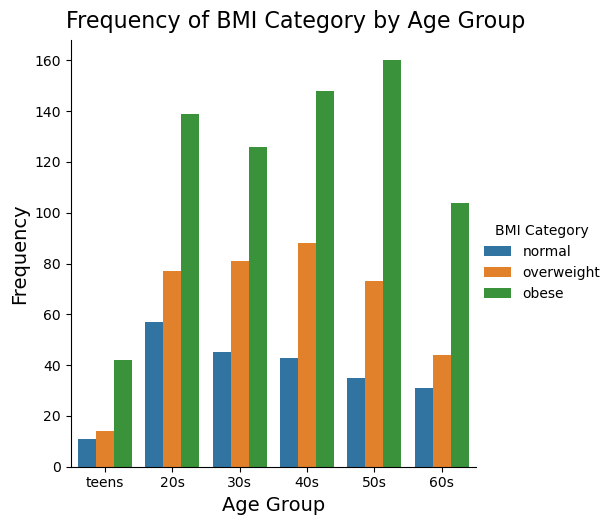

In [28]:
import seaborn as sns

age_order = ['teens', '20s', '30s', '40s', '50s', '60s']
bmi_order = ['normal', 'overweight', 'obese']

plot = sns.catplot(x='Age Group', 
                   hue='BMI Category', 
                   hue_order=bmi_order,
                   data=filtered_df, 
                   kind='count', 
                   order=age_order)

plot.set_axis_labels('Age Group', 'Frequency', fontsize=14)
plot.fig.suptitle('Frequency of BMI Category by Age Group', fontsize=16, y=1.03)

Next I see what effect regional differences have on BMI. The dataset contains four regions of the United States (SW, SE, NW, NE).  Here we can see two things: (1) the highest frequency of obese individuals in the southeast.  And (2) It is individuals in their 20s who have the highest incidence of obesity, which goes against the other regions and overall trend.

Text(0.5, 1.03, 'Frequency of BMI Category by Age Group by Geographic Region')

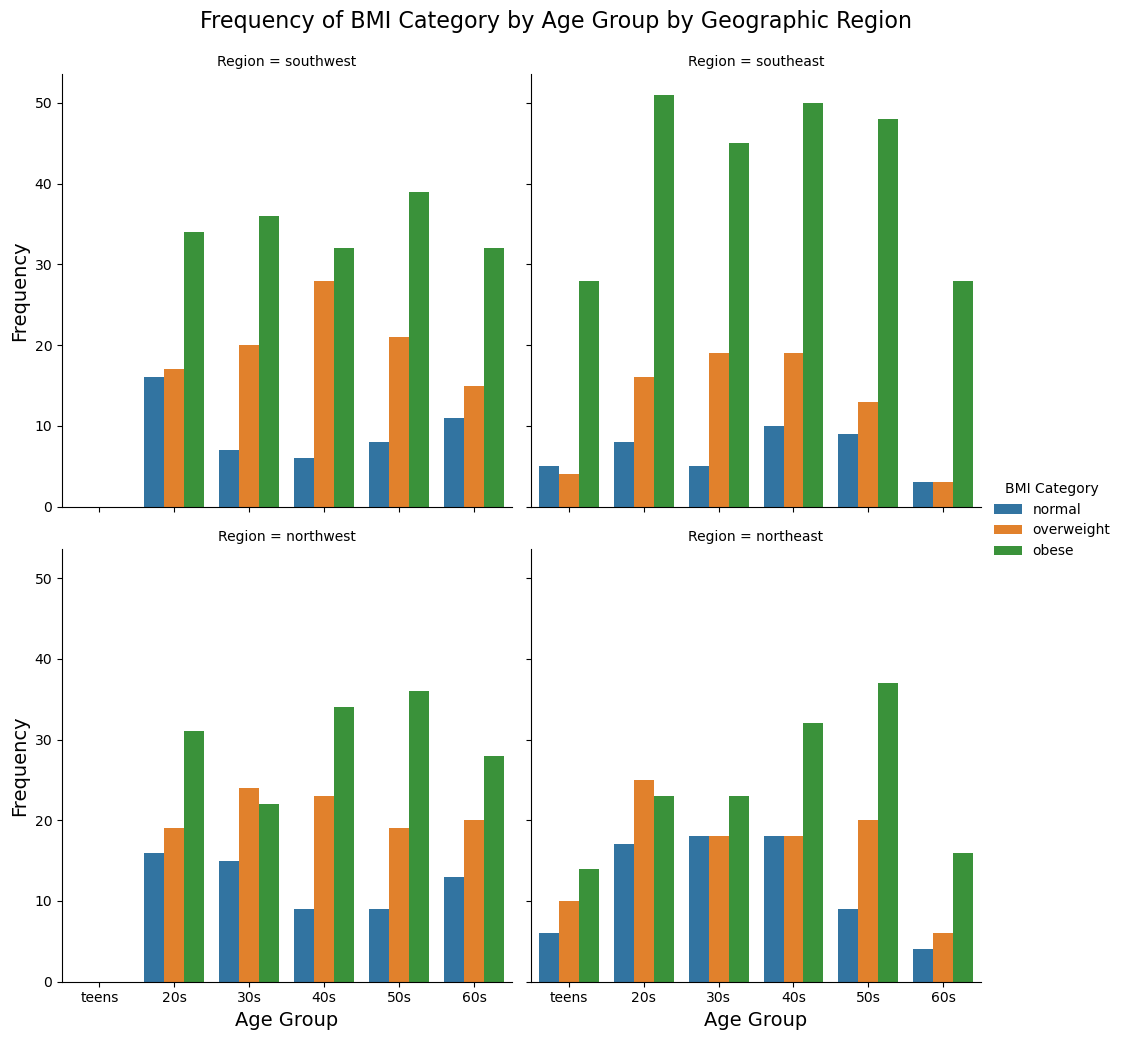

In [29]:
age_order = ['teens', '20s', '30s', '40s', '50s', '60s']
bmi_order = ['normal', 'overweight', 'obese']

plot = sns.catplot(x='Age Group', 
                   hue='BMI Category', 
                   data=filtered_df, 
                   kind='count', 
                   order=age_order, 
                   hue_order=bmi_order,
                   col='Region', 
                   col_wrap=2)

plot.set_xlabels('Age Group', fontsize=14)
plot.set_ylabels('Frequency', fontsize=14)
plot.fig.suptitle('Frequency of BMI Category by Age Group by Geographic Region', fontsize=16, y=1.03)


By pivoting my data, I was able to create a heat map of average BMI by region.  This visualization confirms that the highest average BMI exists in the southeast region, which confirms results from the above visualization.

Text(0.5, 1.0, 'Average BMI by Region')

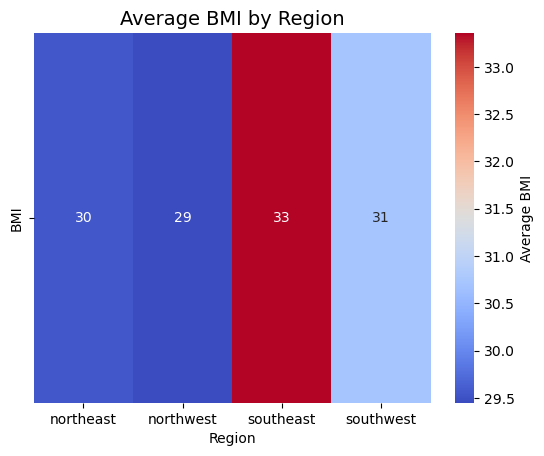

In [30]:
pivot_table = filtered_df.pivot_table(values="BMI", columns="Region", aggfunc="mean")

sns.heatmap(filtered_df.pivot_table(values="BMI", columns="Region", aggfunc="mean"),
            annot=True,
            cmap="coolwarm",
            cbar_kws={'label': 'Average BMI'})\
   .set_title('Average BMI by Region', fontsize=14)



We can see even when broken down by gender, the southeast has the highest average BMI for both men and women

Text(0.5, 1.0, 'Average BMI by Gender and Region')

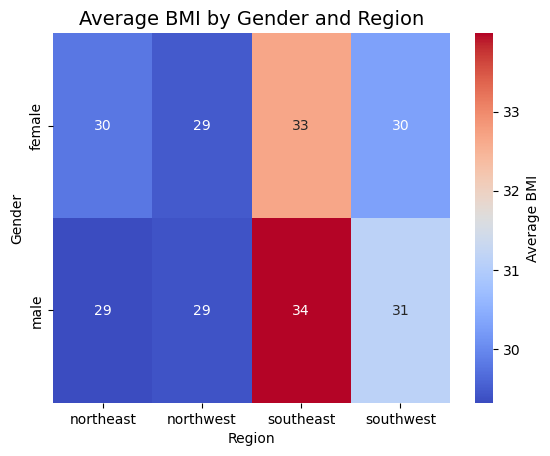

In [31]:
sns.heatmap(filtered_df.pivot_table(values="BMI", index="Gender", columns="Region", aggfunc="mean"),
            annot=True,
            cmap="coolwarm",
            cbar_kws={'label': 'Average BMI'})\
   .set_title('Average BMI by Gender and Region', fontsize=14)



Here we can see another visualization that break down average BMI by region

Text(0.5, 1.0, 'BMI by Region')

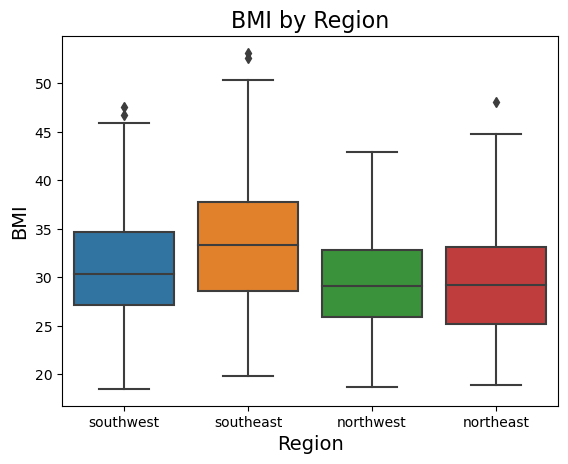

In [56]:
sns.boxplot(data=filtered_df, x="Region", y="BMI")
plt.xlabel("Region", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.title("BMI by Region", fontsize=16)


In [ ]:
And here it is broken down by gender

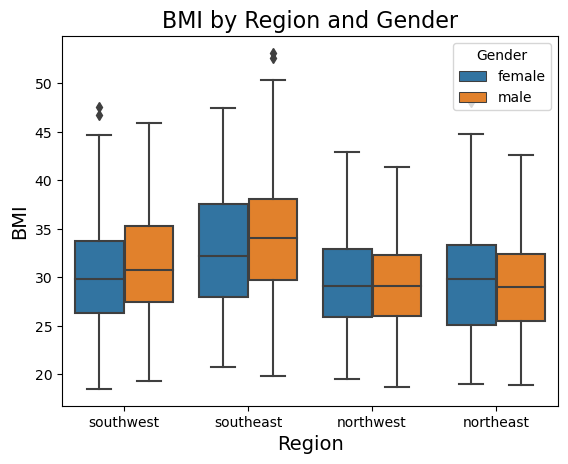

In [57]:
sns.boxplot(data=filtered_df, x="Region", y="BMI", hue="Gender")
plt.xlabel("Region", fontsize=14)
plt.ylabel("BMI", fontsize=14)
plt.title("BMI by Region and Gender", fontsize=16)
plt.legend(title="Gender")

Next I wanted to plot the datapoints for age and BMI on a jointplot.  From this, we can see that there is a trend that shows that an individual's BMI will increase as they get older.


Text(0.5, 1.03, 'Age vs. BMI of Entire Population')

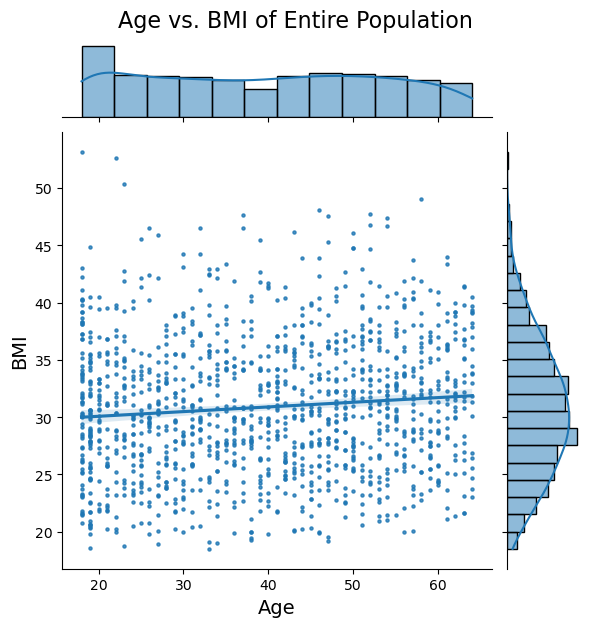

In [60]:
plot = sns.jointplot(x='Age',
                         y='BMI', 
                         data=filtered_df, 
                         kind='reg', 
                         scatter_kws={'s': 5})


plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Entire Population', fontsize=16, y=1.03)

I wanted to next see if there is any difference between smokers and non-smokers.  First we look at non-smokers and see that the trend of the previous graph holds true.

Text(0.5, 1.03, 'Age vs. BMI of Non-Smokers')

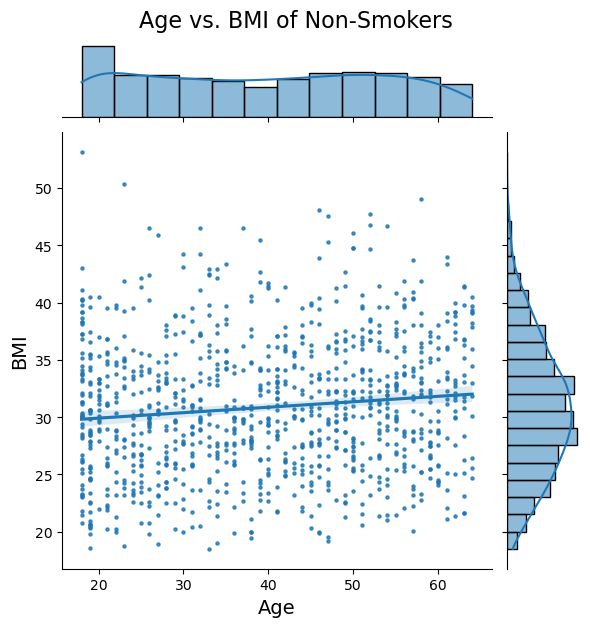

In [61]:
# A joint plot showing age vs bmi for non smokers

smokers_df = filtered_df[filtered_df['Smoker'] == 'no']
plot = sns.jointplot(x='Age',
                         y='BMI', 
                         data=smokers_df, 
                         kind='reg', 
                         scatter_kws={'s': 5})


plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Non-Smokers', fontsize=16, y=1.03)


Next I filtered by smokers, and the resulting graph shows that the trend is noticeably reduced.  It seems that smoking helps an individual keep their weight steady as they age.

Text(0.5, 1.03, 'Age vs. BMI for Smokers')

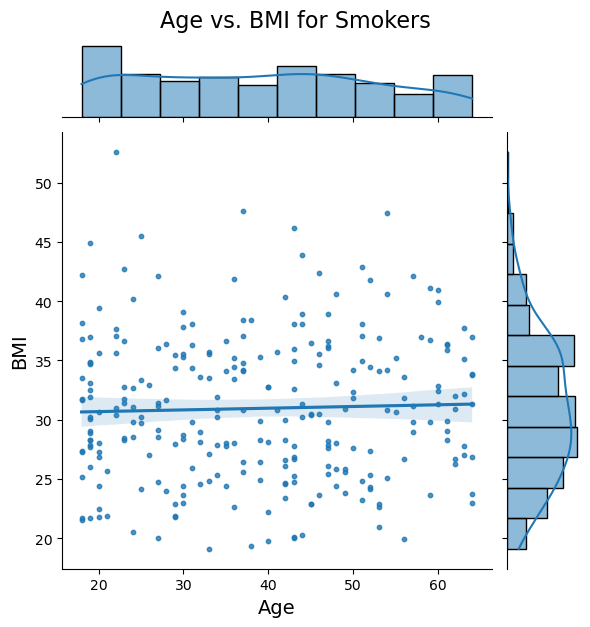

In [33]:
# A joint plot showing age vs bmi for smokers 

smokers_df = filtered_df[filtered_df['Smoker'] == 'yes']

plot = sns.jointplot(x='Age', 
                     y='BMI', 
                     data=smokers_df, 
                     kind='reg', 
                     scatter_kws={'s': 10})

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI for Smokers', fontsize=16, y=1.03)

I was now curious whether the effect of smoking is different for men and women.  First I filtered by smokers who are male.  For males, we can see that smoking actually ever so slightly decreases BMI as individuals age.

Text(0.5, 1.03, 'Age vs. BMI of Smokers Who Are Male')

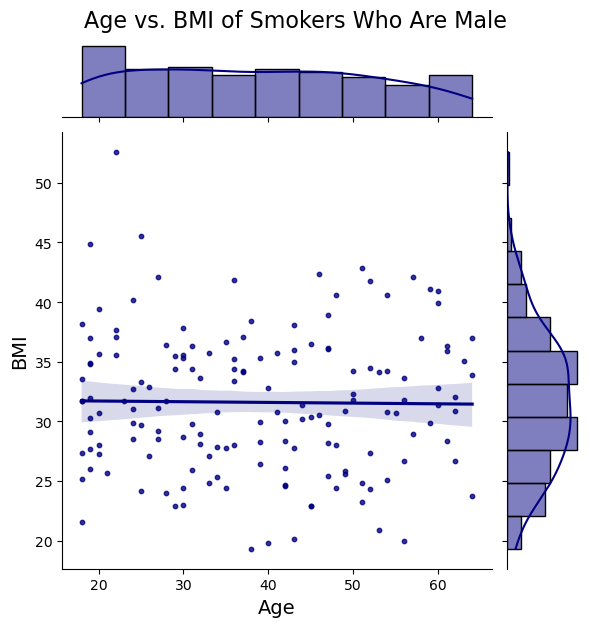

In [34]:
#smokers who are male

male_smokers_df = filtered_df[(filtered_df['Smoker'] == 'yes') & (filtered_df['Gender'] == 'male')]

plot = sns.jointplot(x='Age', 
               y='BMI', 
               data=male_smokers_df, 
               kind='reg', 
               scatter_kws={'s': 10}, 
               color='navy')

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Smokers Who Are Male', fontsize=16, y=1.03)




Next we filter for smokers who are female.  Interestingly, we see that smoking in the female population does not have the same effect as in the male population, and women on average increase their BMI as they age.

Text(0.5, 1.03, 'Age vs. BMI of Smokers Who Are Female')

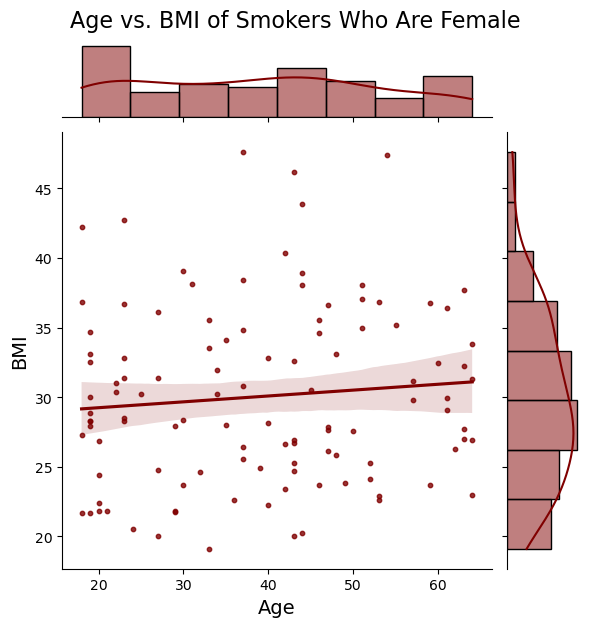

In [35]:
#smokers who are female

female_smokers_df = filtered_df[(filtered_df['Smoker'] == 'yes') & (filtered_df['Gender'] == 'female')]

plot = sns.jointplot(x='Age', 
              y='BMI', 
              data=female_smokers_df, 
              kind='reg', 
              scatter_kws={'s': 10}, 
              color='maroon')

plot.set_axis_labels('Age', 'BMI', fontsize=14)
plot.fig.suptitle('Age vs. BMI of Smokers Who Are Female', fontsize=16, y=1.03)

I had a hunch that the number of children may be responsible for this increase in BMI.  Here we can see that indeed the BMI of a female individual tends to increase with the number of children.

Text(95.72222222222221, 0.5, 'Number of Children')

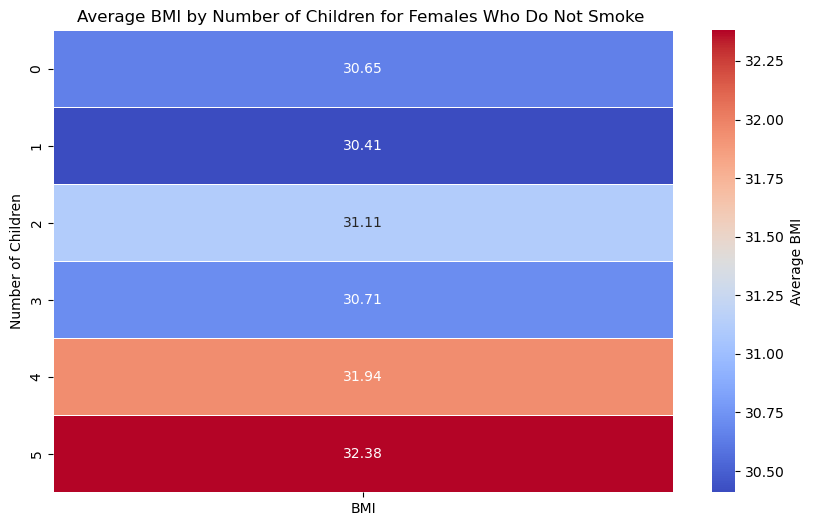

In [66]:

filtered_data = filtered_df[(filtered_df['Smoker'] == 'no') & (filtered_df['Gender'] == 'female')]

grouped_data = filtered_data.groupby(['Children'])['BMI'].mean().reset_index()
pivot_data = grouped_data.pivot_table(values='BMI', index='Children')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Average BMI'})


plt.title('Average BMI by Number of Children for Females Who Do Not Smoke ')
plt.ylabel('Number of Children')


Now I want to see what effect smoking has on a woman's BMI.

Text(95.72222222222221, 0.5, 'Number of Children')

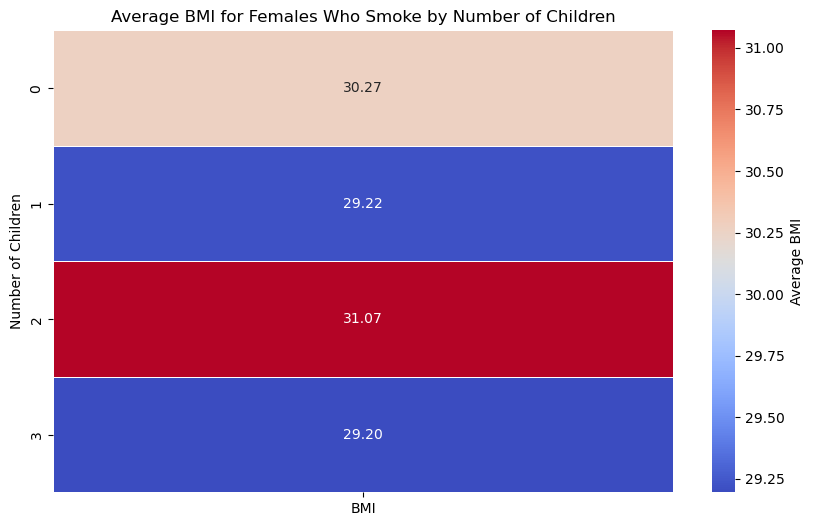

In [67]:
filtered_data = filtered_df[(filtered_df['Smoker'] == 'yes') & (filtered_df['Gender'] == 'female')]

grouped_data = filtered_data.groupby(['Children'])['BMI'].mean().reset_index()
pivot_data = grouped_data.pivot_table(values='BMI', index='Children')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={'label': 'Average BMI'})


plt.title('Average BMI for Females Who Smoke by Number of Children')
plt.ylabel('Number of Children')

## Conclusion

There are a number of interesting insights we can take away from the data.

1. Region effects BMI.  The instances of obesity, as well as the average obesity, is highest in the Southeast.  So, if an individual lives in the southeast, it is more likely they will be obese.  There could be any number of reasons for this.  Perhaps in the southeast there are cultural differences, including in the type of food that is eaten.  People in the south east may be more sedentary as perhaps their cities are less walkable than say New York in the northeast
2. An individual is their 50s is more likely to be obese than any other age group. Likely this is due to the fact as people become less active the older they get.  Interstingly, this trend does not hold true if we only look at the Southeast region.  In the Southeast, the highest incidence of obesity occurs in individuals in their 20s.  From this I conclude that obesity is affecting individuals starting at a younger age than compared to other regions.  Thus, 
3. BMI tends to increase in individuals as they age.  However, smoking reduces this effect, which allows me to conclude that smoking helps people keep their BMIs down as they get older.  However, this effect only seems to effect males. For women, their BMI continues to increase with age.  On further examination, the reason for the difference is that women's BMI increases with the number of children. However, smoking still has an effect: women with children who smoke, despite their BMI increasing with number of chilren, still have a lower overall BMI than women who don't smoke.

Main conclusions:
1. BMI is most prevalent in the southeast of the United States
2. Age and, for women, the number of children increases BMI
3. Smoking decreases BMI in both men and women 